In [164]:
import os
os.getcwd()

'C:\\Users\\PC2307\\02New_class\\first_project'

In [165]:
import pandas as pd

In [166]:
rice_production = pd.read_csv("./data01/시군별_논벼_생산량_정곡_92.9__20231111164947.csv",encoding="utf-8")
rice_production

,행정구역별(1),행정구역별(2),시점,논벼:재배면적 (ha),논벼:10a당 생산량 (kg),논벼:생산량 (톤)
0,서울특별시,소계,2010,267,435,1161
1,서울특별시,소계,2012,267,464,1238
2,서울특별시,소계,2013,249,458,1140
3,서울특별시,소계,2014,306,493,1509
4,서울특별시,소계,2015,307,513,1574
...,...,...,...,...,...,...
2002,제주도,서귀포시,2018,8,348,26
2003,제주도,서귀포시,2019,8,215,16
2004,제주도,서귀포시,2020,8,231,18
2005,제주도,서귀포시,2021,6,382,21


In [167]:
rice_production.columns

Index(['행정구역별(1)', '행정구역별(2)', '시점', '논벼:재배면적 (ha)', '논벼:10a당 생산량 (kg)',
       '논벼:생산량 (톤)'],
      dtype='object')

In [168]:
rice_production.info

<bound method DataFrame.info of      행정구역별(1) 행정구역별(2)    시점  논벼:재배면적 (ha)  논벼:10a당 생산량 (kg)  논벼:생산량 (톤)
0       서울특별시       소계  2010           267               435        1161
1       서울특별시       소계  2012           267               464        1238
2       서울특별시       소계  2013           249               458        1140
3       서울특별시       소계  2014           306               493        1509
4       서울특별시       소계  2015           307               513        1574
...       ...      ...   ...           ...               ...         ...
2002      제주도     서귀포시  2018             8               348          26
2003      제주도     서귀포시  2019             8               215          16
2004      제주도     서귀포시  2020             8               231          18
2005      제주도     서귀포시  2021             6               382          21
2006      제주도     서귀포시  2022             5               378          18

[2007 rows x 6 columns]>

In [169]:
rice_production.isnull().sum()

행정구역별(1)            0
행정구역별(2)            0
시점                  0
논벼:재배면적 (ha)        0
논벼:10a당 생산량 (kg)    0
논벼:생산량 (톤)          0
dtype: int64

# 연도별 지역별 벼 생산량 경작지에 대한 csv file 생성
    한글 긴 heading내용을 영문자로 변경하고, 
    도,광역시 파일과 세부지역 파일 2개의 파일을 분리 생성.
    DB구축하면서 집계파일은 DB에서는 필요없게 되었음
    ** 강원도 고성군과 경상남도 고성군 구분은 DB sql에서 update처리 함
       update rice_product set sub_admin="고성군A"
       where admin_district ="강원도" and sub_admin = "고성군"

In [170]:
import csv
with open("./data01/시군별_논벼_생산량_정곡_92.9__20231111164947.csv", encoding='utf-8') as fr:
    reader = csv.reader(fr)
    with open("./data01/bigcity_product.csv", "w",newline='', encoding="utf-8") as fw1:
        writer1 = csv.writer(fw1)
         
        # heading 행 변경
        b_head = ["p_id", "admin_district", "sub_admin", "b_p_year", "b_rice_culti_ha", "b_rice_per10ha_kg", "b_rice_product_ton"]
        s_head = ["p_id", "admin_district", "sub_admin", "p_year", "rice_culti_ha", "rice_per10ha_kg", "rice_product_ton"]
         
        #print(b_head)
        #print(S_head)
       
        
        # 특별시, 괄역시, 행정구역별 집계데이터
        for i, row in enumerate(reader):
            if i == 0:
                writer1.writerow(b_head)
                continue
            if row[1] == "소계":
                writer1.writerow((i, row))
        
        with open("./data01/시군별_논벼_생산량_정곡_92.9__20231111164947.csv", encoding='utf-8') as fr:
          reader = csv.reader(fr)       
          with open("./data01/smallcity_product.csv", "w",newline='', encoding="utf-8") as fw2:     
             writer2 = csv.writer(fw2) 
             
        # 시, 군, 구 세부 데이터
             for i, row in enumerate(reader):
                if i == 0:
                    writer2.writerow(s_head)
                    continue
                if row[1] != "소계":
                    writer2.writerow((i, row[0], row[1], row[2]+"0101", row[3], row[4], row[5]))
          

In [171]:
rice_production = pd.read_csv("./data01/bigcity_product.csv", encoding="utf-8")
rice_production

,p_id,admin_district,sub_admin,b_p_year,b_rice_culti_ha,b_rice_per10ha_kg,b_rice_product_ton
0,1,"['서울특별시', '소계', '2010', '267', '435', '1161']",NaN,NaN,NaN,NaN,NaN
1,2,"['서울특별시', '소계', '2012', '267', '464', '1238']",NaN,NaN,NaN,NaN,NaN
2,3,"['서울특별시', '소계', '2013', '249', '458', '1140']",NaN,NaN,NaN,NaN,NaN
3,4,"['서울특별시', '소계', '2014', '306', '493', '1509']",NaN,NaN,NaN,NaN,NaN
4,5,"['서울특별시', '소계', '2015', '307', '513', '1574']",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
194,1988,"['제주도', '소계', '2018', '8', '348', '26']",NaN,NaN,NaN,NaN,NaN
195,1989,"['제주도', '소계', '2019', '8', '215', '16']",NaN,NaN,NaN,NaN,NaN
196,1990,"['제주도', '소계', '2020', '8', '231', '18']",NaN,NaN,NaN,NaN,NaN
197,1991,"['제주도', '소계', '2021', '6', '382', '21']",NaN,NaN,NaN,NaN,NaN


In [172]:
#import matplotlib.pyplot as plt
#import numpy as np
"""
labels = rice_production.admin_district.unique()
sizes = rice_production.admin_district.value_counts()
colors=['yellowgreen', 'lightskyblue', 'lightcoral', 'blue', 'coral']
plt.pie(sizes, labels= labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.show()
"""

"\nlabels = rice_production.admin_district.unique()\nsizes = rice_production.admin_district.value_counts()\ncolors=['yellowgreen', 'lightskyblue', 'lightcoral', 'blue', 'coral']\nplt.pie(sizes, labels= labels, colors=colors, autopct='%1.1f%%', startangle=90)\nplt.show()\n"

# DB 구축작업
pandas에서 데이터 handling이 어렵기 때문임

In [173]:
!pip install pymysql

In [174]:
import pymysql 
import csv

conn = pymysql.connect(
    host="127.0.0.1",
    user="root",
    password="1234",
    database="project01",
)

In [175]:
#테스트 - 기존 데이터 일괄 삭제
delete_sql = "delete from rice_product"
with conn.cursor() as cursor:
    result = cursor.execute(delete_sql)
    conn.commit()
    print("deleted:", result) 

deleted: 1808


In [176]:
# Bulk write 기법 사용
write_sql = "INSERT INTO rice_product VALUES (%s,%s,%s,%s,%s,%s,%s)"

In [177]:
def _execute_insert(buffer):
    with conn.cursor() as cursor:
        result = cursor.executemany(write_sql, buffer)
        conn.commit()
        print("write:", result)
def bulk_write(data_file_path, batchsize=100):
    with open(data_file_path,  encoding="utf-8") as fr:
        reader = csv.reader(fr)
        buffer = []
        for i, row in enumerate(reader):
            if i == 0:
                continue
            row = [x if x else None for x in row]
            buffer.append(row)
            if len(buffer) == batchsize:
                _execute_insert(buffer)
                buffer = []
        if buffer:
            _execute_insert(buffer)

In [178]:
bulk_write("./data01/smallcity_product.csv")

write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 8


# 년도별 벼의 총생산량, 경작면적, 단위 생산량 추이 시각화

In [179]:
import pandas as pd

def read_data(sql):
    return pd.read_sql(sql, conn)

In [180]:
read_sql = """
SELECT
    YEAR(p_year) as year,
    SUM(rice_product_ton) as production_ton
FROM
    rice_product
GROUP BY
    1
ORDER BY
    1 DESC
"""

In [181]:
df = read_data(read_sql)
df

C:\Users\PC2307\AppData\Local\Temp\ipykernel_17576\1875548506.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql, conn)


,year,production_ton
0,2022,3613315.0
1,2021,3725199.0
2,2020,3366222.0
3,2019,3598234.0
4,2018,3716738.0
5,2017,3819289.0
6,2016,4033728.0
7,2015,4261084.0
8,2014,4173084.0
9,2013,4160846.0


In [182]:
import seaborn as sns
from matplotlib import pyplot as plt

# 한글표시 기능 추가
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

[Text(0.5, 1.0, '년도별 벼 생산량(ton)')]

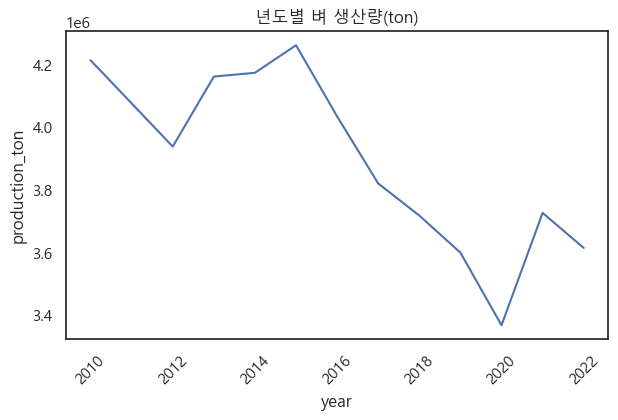

In [183]:
plt.xticks(rotation=45)

sns.lineplot(
    data=df,
    x="year",
    y="production_ton"
).set(
    title="년도별 벼 생산량(ton)"
)

In [184]:
read_sql = """
SELECT
    YEAR(p_year) as year,
    SUM(rice_culti_ha) as cultivation_ha
FROM
    rice_product
GROUP BY
    1
ORDER BY
    1 DESC
"""
df = read_data(read_sql)
df

C:\Users\PC2307\AppData\Local\Temp\ipykernel_17576\1875548506.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql, conn)


,year,cultivation_ha
0,2022,696888.0
1,2021,701955.0
2,2020,696743.0
3,2019,700213.0
4,2018,707793.0
5,2017,724265.0
6,2016,746245.0
7,2015,785923.0
8,2014,801523.0
9,2013,818000.0


[Text(0.5, 1.0, '년도별 경작지 변화 추이(ha)')]

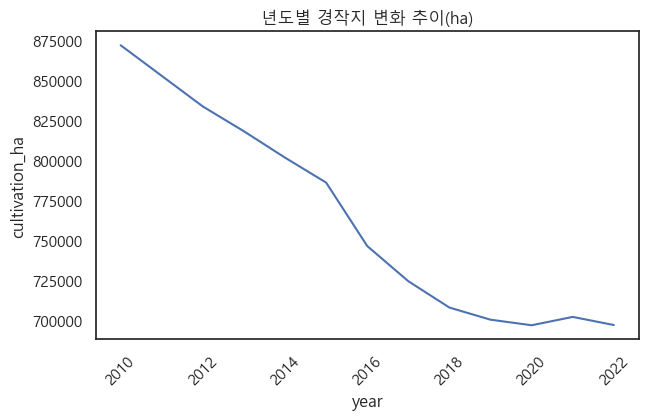

In [185]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.xticks(rotation=45)

sns.lineplot(
    data=df,
    x="year",
    y="cultivation_ha"
).set(
    title="년도별 경작지 변화 추이(ha)"
)

In [186]:
read_sql = """
SELECT
    YEAR(p_year) as year,
    SUM(rice_per10ha_kg) as product_kg_per_10ha
FROM
    rice_product
GROUP BY
    1
ORDER BY
    1 DESC
"""
df = read_data(read_sql)
df

C:\Users\PC2307\AppData\Local\Temp\ipykernel_17576\1875548506.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql, conn)


,year,product_kg_per_10ha
0,2022,75368.0
1,2021,77419.0
2,2020,69501.0
3,2019,74085.0
4,2018,75712.0
5,2017,75472.0
6,2016,78480.0
7,2015,81883.0
8,2014,78487.0
9,2013,76250.0


[Text(0.5, 1.0, '년도별 단위면적당 생산량 추이(kg/10ha)')]

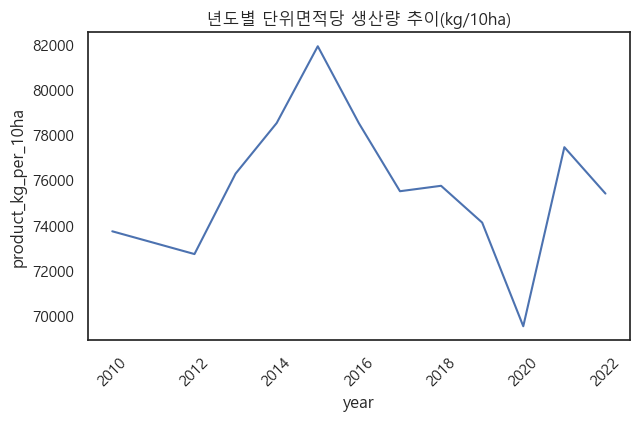

In [187]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.xticks(rotation=45)

sns.lineplot(
    data=df,
    x="year",
    y="product_kg_per_10ha"
).set(
    title="년도별 단위면적당 생산량 추이(kg/10ha)"
)

In [188]:
read_sql = """
SELECT
    admin_district as province,
    SUM(rice_product_ton) as product_ton
FROM
    rice_product
WHERE
    YEAR(p_year) = "2022"
GROUP BY
    1
ORDER BY
    2 DESC
"""
df = read_data(read_sql)
df;

C:\Users\PC2307\AppData\Local\Temp\ipykernel_17576\1875548506.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql, conn)


# 도, 광역시별 벼의 총생산량, 경작면적, 단위 생산량 시각화

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

[Text(0.5, 1.0, '2022년도 도,광역시별 벼 생산량(ton)')]

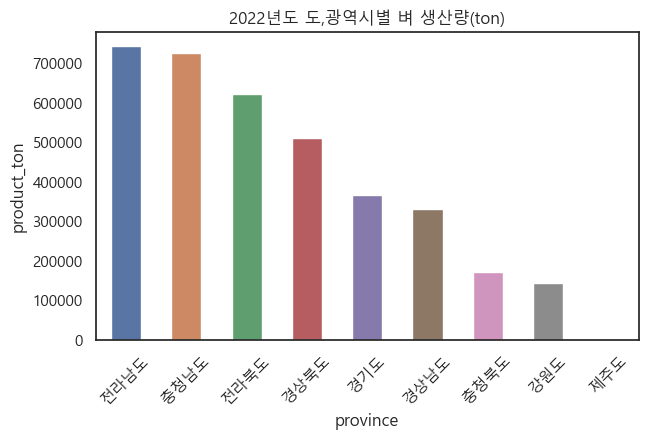

In [190]:
plt.xticks(rotation=45)
sns.barplot(
    x="province", 
    y="product_ton", 
    data=df,
    width=0.5
).set(
    title="2022년도 도,광역시별 벼 생산량(ton)"
)

In [191]:
read_sql = """
SELECT
    admin_district as province,
    SUM(rice_culti_ha) as ploughland_ha
FROM
    rice_product
WHERE
    YEAR(p_year) = "2022"
GROUP BY
    1
ORDER BY
    2 DESC
"""
df = read_data(read_sql)
df

C:\Users\PC2307\AppData\Local\Temp\ipykernel_17576\1875548506.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql, conn)


,province,ploughland_ha
0,전라남도,154361.0
1,충청남도,133978.0
2,전라북도,113774.0
3,경상북도,94745.0
4,경기도,73644.0
5,경상남도,64480.0
6,충청북도,33195.0
7,강원도,28706.0
8,제주도,5.0


[Text(0.5, 1.0, '2022년도 도,광역시별 벼 경작지(ha)')]

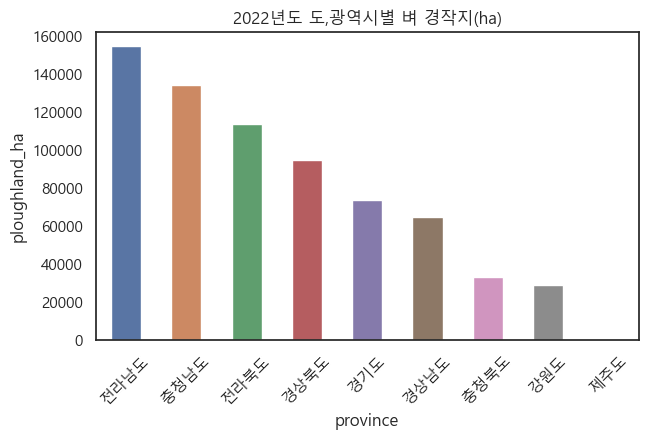

In [192]:
plt.xticks(rotation=45)
sns.barplot(
    x="province", 
    y="ploughland_ha", 
    data=df,
    width=0.5
).set(
    title="2022년도 도,광역시별 벼 경작지(ha)"
)

In [193]:
read_sql = """
SELECT
    admin_district as province,
    SUM(rice_per10ha_kg) as product_kg_per_10ha
FROM
    rice_product
WHERE
    YEAR(p_year) = "2022"
GROUP BY
    1
ORDER BY
    2 DESC
"""
df = read_data(read_sql)
df

C:\Users\PC2307\AppData\Local\Temp\ipykernel_17576\1875548506.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql, conn)


,province,product_kg_per_10ha
0,경기도,14204.0
1,경상북도,11629.0
2,전라남도,10526.0
3,경상남도,9156.0
4,강원도,8294.0
5,충청남도,8026.0
6,전라북도,7513.0
7,충청북도,5642.0
8,제주도,378.0


[Text(0.5, 1.0, '2022년도 도,광역시별 단위변적당 생산량(kg/ha)')]

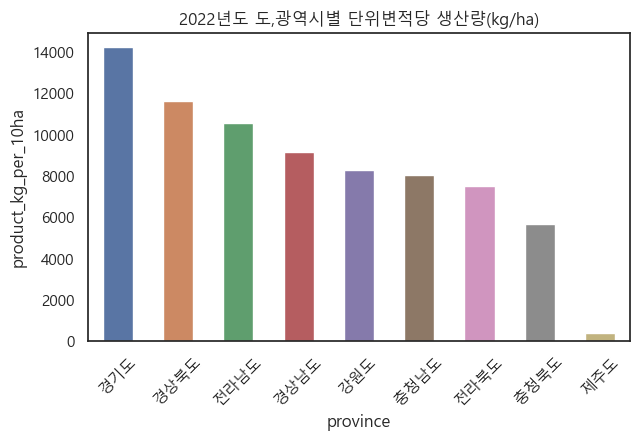

In [194]:
plt.xticks(rotation=45)
sns.barplot(
    x="province", 
    y="product_kg_per_10ha", 
    data=df,
    width=0.5
).set(
    title="2022년도 도,광역시별 단위변적당 생산량(kg/ha)"
)

# 꺾은선 그래프 작성

In [195]:
read_sql = """
SELECT
    sub_admin as "city",
    YEAR(p_year) as "year",
    rice_per10ha_kg as "prod"
FROM
    rice_product
WHERE
    sub_admin = "평택시" OR 
    sub_admin = "안성시" OR
    sub_admin = "용인시" OR
    sub_admin = "김포시" OR
    sub_admin = "이천시"
ORDER BY
    1, 2
"""
df = read_data(read_sql)
df

C:\Users\PC2307\AppData\Local\Temp\ipykernel_17576\1875548506.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql, conn)


,city,year,prod
0,김포시,2010,429
1,김포시,2012,486
2,김포시,2013,466
3,김포시,2014,492
4,김포시,2015,510
5,김포시,2016,511
6,김포시,2017,508
7,김포시,2018,516
8,김포시,2019,469
9,김포시,2020,455


[Text(0.5, 1.0, '경기도 5개 지역 단위면적당 생산량 연도별 추이(kg/10ha)')]

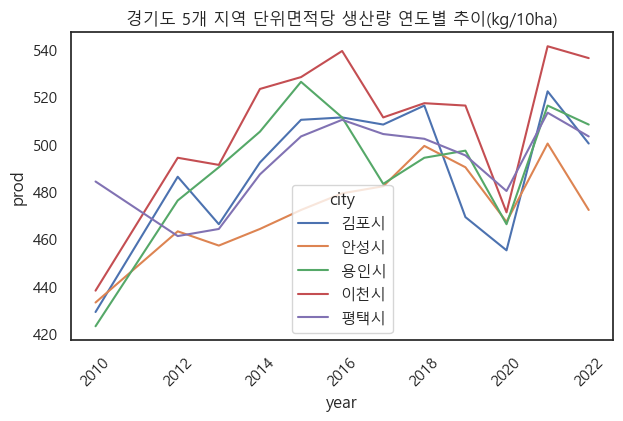

In [196]:
plt.xticks(rotation=45)

sns.lineplot(
    data=df,
    x="year",
    y="prod",
    hue="city"
).set(
    title="경기도 5개 지역 단위면적당 생산량 연도별 추이(kg/10ha)"
)

# Boxplot 작성

In [197]:
read_sql = """
SELECT
    sub_admin as "city",
    year(p_year) as "year",
    rice_product_ton as "p_ton"
FROM
    rice_product
  
"""
df = read_data(read_sql)
df

C:\Users\PC2307\AppData\Local\Temp\ipykernel_17576\1875548506.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql, conn)


,city,year,p_ton
0,강화군,2010,44728
1,강화군,2012,49163
2,강화군,2013,45465
3,강화군,2014,47620
4,강화군,2015,43862
...,...,...,...
1803,서귀포시,2018,26
1804,서귀포시,2019,16
1805,서귀포시,2020,18
1806,서귀포시,2021,21


[Text(0.5, 1.0, '2010~2020년 생산량에 대한 Boxplot 그래프')]

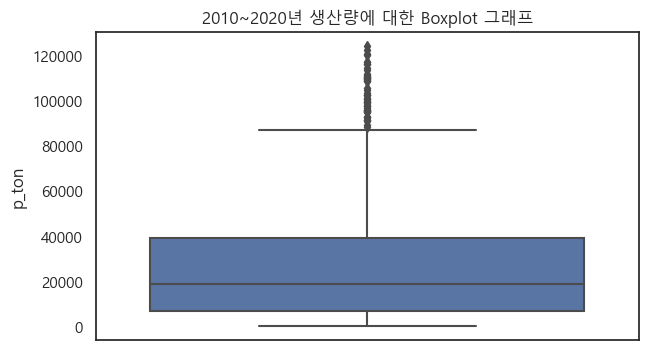

In [198]:
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

sns.boxplot(
    y="p_ton",
    data=df,
).set(
    title="2010~2020년 생산량에 대한 Boxplot 그래프"
)

In [199]:
read_sql = """
SELECT
    sub_admin as "city",
    year(p_year) as "year",
    rice_product_ton as "p_ton"
FROM
    rice_product
WHERE
    sub_admin = "당진시" OR 
    sub_admin = "김제시" OR
    sub_admin = "서산시" OR
    sub_admin = "해남군" OR
    sub_admin = "익산시"
ORDER BY
    1
"""
df = read_data(read_sql)
df

C:\Users\PC2307\AppData\Local\Temp\ipykernel_17576\1875548506.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql, conn)


,city,year,p_ton
0,김제시,2012,110469
1,김제시,2017,105677
2,김제시,2016,111347
3,김제시,2015,122350
4,김제시,2014,116196
5,김제시,2013,116455
6,김제시,2010,117106
7,김제시,2018,100872
8,김제시,2019,92571
9,김제시,2020,82631


[Text(0.5, 1.0, '2010~2020년 생산량 상위 5개 시군에 대한 Boxplot 그래프')]

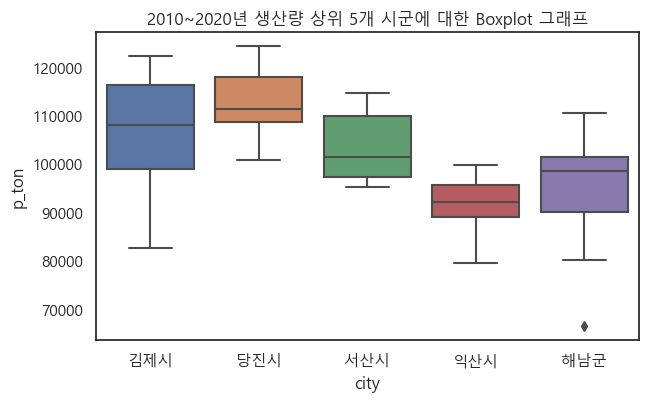

In [200]:
sns.boxplot(
    y="p_ton",
    x="city",
    data=df,
).set(
    title="2010~2020년 생산량 상위 5개 시군에 대한 Boxplot 그래프"
)

# 기상관측 데이터 전처리 및 DB구축

기상청 관측지역과 벼농사 재배 지역을 
조인하기 위해 별도 항목을 배정 
벼생산 상위지역 5개는 참조도시에 넣음

천안 - 당진시
부안 - 김제시
서산 - 서산시
해남 - 해남군
전주 - 익산시

In [201]:
#월별 관측자료 전처리
import csv
with open("./data01/OBS_ASOS_MNH_20231111171922.csv", encoding='ANSI') as fr:
    reader = csv.reader(fr)
    tot_cnt = 0
    wk_date = []
    with open("./data01/mon_weather_obsv.csv","w", newline='', encoding="utf-8") as fw:
        writer = csv.writer(fw)
         
        # heading 행 변경
        chg_head = ["w_id", "pos_no", "pos_name", "ym", "ave_temp", "rel_humid", "mon_fall", "tot_sunshine", "ave_ground_temp"]
        
        for i, row in enumerate(reader):
            if i == 0:
                writer.writerow(chg_head)
                continue
            tot_cnt += 1
            
            row_3 = row[3]  # 문자 혹은 null값 0으로 치환
            if row_3.isalnum() or row_3=="":
                row_3 = 0
            row_4 = row[4] 
            if row_4.isalnum() or row_4=="":
                row_4 = 0
            row_5 = row[5] 
            if row_5.isalnum() or row_5=="":
                row_5 = 0    
            row_6 = row[6] 
            if row_6.isalnum() or row_6=="":
                row_6 = 0
            row_7 = row[7] 
            if row_7.isalnum() or row_7=="":
                row_7 = 0
            
            wk_date = row[2].replace('-','') + "01"
            writer.writerow((i, row[0], row[1], wk_date, row_3, row_4, row_5, row_6, row_7))
print("write count(except heading row): ", tot_cnt)

write count(except heading row):  16661


In [202]:
#데이터 확인
with open("./data01/mon_weather_obsv.csv", encoding='utf-8') as fr:
    reader = csv.reader(fr)
    tot_cnt = 0
   
    #chg_head = ["w_id", "pos_no", "pos_name", "ym", "ave_temp", "rel_humid", "mon_fall", "tot_sunshine", "ave_ground_temp"]
        
    for i, row in enumerate(reader):
        if i > 10:
            break
        print(i, row)

0 ['w_id', 'pos_no', 'pos_name', 'ym', 'ave_temp', 'rel_humid', 'mon_fall', 'tot_sunshine', 'ave_ground_temp']
1 ['1', '90', '속초', '20080101', '.3', '0', '71.1', '161.5', '-.8']
2 ['2', '90', '속초', '20080201', '1.3', '0', '.6', '0', '-.2']
3 ['3', '90', '속초', '20080301', '7.3', '0', '103.9', '0', '7.3']
4 ['4', '90', '속초', '20080401', '13.1', '0', '13.5', '210.8', '0']
5 ['5', '90', '속초', '20080501', '16.8', '0', '0', '205.1', '20.8']
6 ['6', '90', '속초', '20080601', '18.7', '0', '91.3', '174.1', '23.4']
7 ['7', '90', '속초', '20080701', '25.3', '0', '361.6', '0', '29.1']
8 ['8', '90', '속초', '20080801', '23.4', '0', '343.1', '188.7', '26.9']
9 ['9', '90', '속초', '20080901', '20.7', '0', '129.9', '196.3', '23.9']
10 ['10', '90', '속초', '20081001', '16.8', '0', '73.5', '208.6', '16.3']


In [203]:
#이상데이터 처리 모음 (null data --> 0) 처음부터 재가동시 참조
import pandas as pd
mon_weather_data = pd.read_csv("./data01/mon_weather_obsv.csv",encoding="utf-8")
mon_weather_data
mon_weather_data.info()
mon_weather_data.isnull().sum()
# mon_weather_data.loc[mon_weather_data.ave_temp.isnull(),'ave_temp'] = '0'
# 널값이 없다고 나왔으나 실제 데이터에는 존재하기에 
# 위의 생성 프로그램 내에서 재처리하였음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16661 entries, 0 to 16660
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   w_id             16661 non-null  int64  
 1   pos_no           16661 non-null  int64  
 2   pos_name         16661 non-null  object 
 3   ym               16661 non-null  int64  
 4   ave_temp         16661 non-null  float64
 5   rel_humid        16661 non-null  int64  
 6   mon_fall         16661 non-null  float64
 7   tot_sunshine     16661 non-null  float64
 8   ave_ground_temp  16661 non-null  float64
dtypes: float64(4), int64(4), object(1)
memory usage: 1.1+ MB


w_id               0
pos_no             0
pos_name           0
ym                 0
ave_temp           0
rel_humid          0
mon_fall           0
tot_sunshine       0
ave_ground_temp    0
dtype: int64

In [204]:
# 주의!! 재작업시 사용 - 기존 데이터 일괄 삭제

delete_sql = "delete from mon_weather_obsv"
with conn.cursor() as cursor:
    result = cursor.execute(delete_sql)
    conn.commit()
    print("deleted:", result)


deleted: 16661


In [205]:
# DB에 데이터 생성
write02_sql = "INSERT INTO mon_weather_obsv VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s)"
def _execute_insert(buffer):
    with conn.cursor() as cursor:
        result = cursor.executemany(write02_sql, buffer)
        conn.commit()
        print("write:", result)

In [206]:
def bulk_write(data_file_path, batchsize=100):
    with open(data_file_path, encoding='utf-8') as fr:
        reader = csv.reader(fr)
        buffer = []
        for i, row in enumerate(reader):
            if i == 0:
                continue
            row = [x if x else None for x in row]
            buffer.append(row)
            if len(buffer) == batchsize:
                _execute_insert(buffer)
                buffer = []
        if buffer:
            _execute_insert(buffer)

In [207]:
bulk_write("./data01/mon_weather_obsv.csv")

write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100

In [208]:
# 년별 기상관측자료 취합 및 참조 측정지역 추가 (벼재배 지역 match용) 
with open("./data01/mon_weather_obsv.csv", encoding='utf-8') as fr:
    reader = csv.reader(fr)
    tot_cnt = 0
    wk_date = []
    with open("./data01/anual_weather_obsv.csv","w", newline='', encoding="utf-8") as fw:
        writer = csv.writer(fw)
        
        # heading 행 변경
        #chg_head = ["w_id", "pos_no", "pos_name", "ym", "ave_temp", "rel_humid", "mon_fall", "tot_sunshine", "ave_ground_temp"]
        chg_head = ("a_id", "pos_name", "ref_name", "yyyy", "ave_temp", "max_temp","min_temp", "year_fall", "year_sunshine") 
        new_row = []
        pos_name = ""
        ref_name = ""
        yyyy = "000000"
        sub_cnt = 0
        wrt_cnt = 0
        ave_temp = 0.0
        max_temp = 0.0
        min_temp = 0.0
        year_fall = 0.0
        year_sunshine = 0.0
                    
        for i, row in enumerate(reader):
            if i == 0:
                writer.writerow(chg_head)
                continue
           
            if int(row[3][4:6]) < 4 or int(row[3][4:6]) > 9:
                continue
            sub_cnt += 1
            
            if row[3][4:8] == "0401":
                pos_name = row[2]
                yyyy = row[3][0:4] + "0101"
                ave_temp = float(row[4])
                max_temp = float(row[4])
                min_temp = float(row[4])
                year_fall = float(row[6])
                year_sunshine = float(row[7])
                continue
                    
            ave_temp = ave_temp + float(row[4])
            if max_temp < float(row[4]):
                max_temp = float(row[4])    
            if min_temp > float(row[4]):
                min_temp = float(row[4])    
            year_fall = year_fall + float(row[6])
            year_sunshine = year_sunshine + float(row[7])
                    
            if row[3][4:8] == "0901":
                yyyy = row[3][0:4] + "0101"
                if sub_cnt != 0:
                    ave_temp = ave_temp / sub_cnt
                else:
                    ave_temp = 0
                sub_cnt = 0
                ref_name = pos_name
                if pos_name == "천안":
                    ref_name = "당진시"
                if pos_name == "부안":
                    ref_name = "김제시"       
                if pos_name == "서산":
                    ref_name = "서산시"
                if pos_name == "해남":
                    ref_name = "해남군"
                if pos_name == "전주":
                    ref_name = "익산시"
                    #print(i, row, "%%%")
                wrt_cnt += 1
                writer.writerow((wrt_cnt, pos_name, ref_name, yyyy, ave_temp, max_temp, min_temp, year_fall, year_sunshine))

In [209]:
# 데이터 확인
import pandas as pd
mon_weather_data = pd.read_csv("./data01/anual_weather_obsv.csv",encoding="utf-8")
mon_weather_data

,a_id,pos_name,ref_name,yyyy,ave_temp,max_temp,min_temp,year_fall,year_sunshine
0,1,속초,속초,20080101,19.666667,25.3,13.1,939.4,975.0
1,2,속초,속초,20090101,15.916667,23.1,0.0,1015.8,1103.2
2,3,속초,속초,20100101,12.550000,25.7,0.0,568.3,1022.3
3,4,속초,속초,20110101,18.900000,24.8,11.4,1265.0,790.0
4,5,속초,속초,20120101,19.366667,24.4,12.1,812.6,703.4
...,...,...,...,...,...,...,...,...,...
1378,1379,남해,남해,20180101,17.366667,27.1,0.0,889.6,1017.7
1379,1380,남해,남해,20190101,17.100000,25.1,0.0,1296.3,1054.7
1380,1381,남해,남해,20200101,20.716667,27.2,12.5,955.7,1105.9
1381,1382,남해,남해,20210101,21.516667,26.1,14.3,1575.9,920.8


In [210]:
#테스트 - 기존 anual_weather_obsv DB 데이터 일괄 삭제
delete_sql = "delete from anual_weather_obsv"
with conn.cursor() as cursor:
    result = cursor.execute(delete_sql)
    conn.commit()
    print("deleted:", result) 

deleted: 1383


In [211]:
write02_sql = "INSERT INTO anual_weather_obsv VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s)"
def _execute_insert(buffer):
    with conn.cursor() as cursor:
        result = cursor.executemany(write02_sql, buffer)
        conn.commit()
        print("write:", result)
        
def bulk_write(data_file_path, batchsize=100):
    with open(data_file_path, encoding='utf-8') as fr:
        reader = csv.reader(fr)
        buffer = []
        for i, row in enumerate(reader):
            if i == 0:
                continue
            row = [x if x else None for x in row]
            buffer.append(row)
            if len(buffer) == batchsize:
                _execute_insert(buffer)
                buffer = []
        if buffer:
            _execute_insert(buffer)

In [212]:
bulk_write("./data01/anual_weather_obsv.csv")

write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 100
write: 83


# 벼 성장기 온도, 강수량, 일조량 시각화

In [213]:
import seaborn as sns
import matplotlib.pyplot as plt

# 한글표시 기능 추가
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

In [214]:
import pandas as pd

def read_data(sql):
    return pd.read_sql(sql, conn)

In [215]:
#연도별 특정지역의 기상관측치 추이 시각화
read_sql = """
SELECT
    ref_name AS "지역",
    year(yyyy) AS "경작년도", 
    #year_fall "강우량(mm)" 
    #year_sunshine "일조량(시간)" 
     ave_temp "평균온도" 
    #max_temp "월평균최대온도" 
    #min_temp "월평균최저온도"   
FROM
    anual_weather_obsv
WHERE
    ref_name = "당진시" OR 
    ref_name = "김제시" OR
    #ref_name = "서산시" OR
    ref_name = "해남군"
    #ref_name = "익산시"
#ORDER BY
#    1 
  
"""
df = read_data(read_sql)
df

C:\Users\PC2307\AppData\Local\Temp\ipykernel_17576\1875548506.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql, conn)


,지역,경작년도,평균온도
0,당진시,2008,17.00000
1,당진시,2009,16.26670
2,당진시,2010,16.46670
3,당진시,2011,20.46670
4,당진시,2012,17.88330
5,당진시,2013,17.98330
6,당진시,2014,16.86670
7,당진시,2015,20.73330
8,당진시,2016,9.01667
9,당진시,2017,20.26670


[Text(0.5, 1.0, '특정지역 벼 성장기간 년도별 평균온도 변화')]

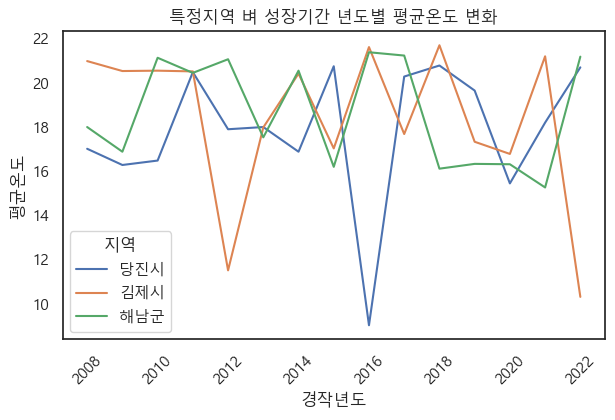

In [216]:
plt.xticks(rotation=45)

sns.lineplot(
    data=df,
    x="경작년도",
    y="평균온도",
    hue="지역"
).set(
    title="특정지역 벼 성장기간 년도별 평균온도 변화"
)

In [217]:
#특정 지역 생산량이 낮은 2020년도의 월별 기상관측치 추이 

def read_data(sql):
    return pd.read_sql(sql, conn)

read_sql = """
SELECT
    pos_name as "city",
    ym as "year_month",
    ave_temp as "average_temperature"
FROM
    mon_weather_obsv
WHERE
    (pos_name = "서산" OR
     pos_name = "해남" OR
     pos_name = "전주" OR
     pos_name = "천안" OR
     pos_name = "부안") AND 
    (ym >= "20200401" AND 
     ym <  "20201001")

"""
df = read_data(read_sql)
df

C:\Users\PC2307\AppData\Local\Temp\ipykernel_17576\3258741214.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql, conn)


,city,year_month,average_temperature
0,서산,2020-04-01,9.8
1,서산,2020-05-01,16.9
2,서산,2020-06-01,22.1
3,서산,2020-07-01,0.0
4,서산,2020-08-01,26.2
5,서산,2020-09-01,20.5
6,전주,2020-04-01,10.9
7,전주,2020-05-01,18.6
8,전주,2020-06-01,23.4
9,전주,2020-07-01,23.5


[Text(0.5, 1.0, '2020년 특정지역 벼 생장기 기간 온도 변화')]

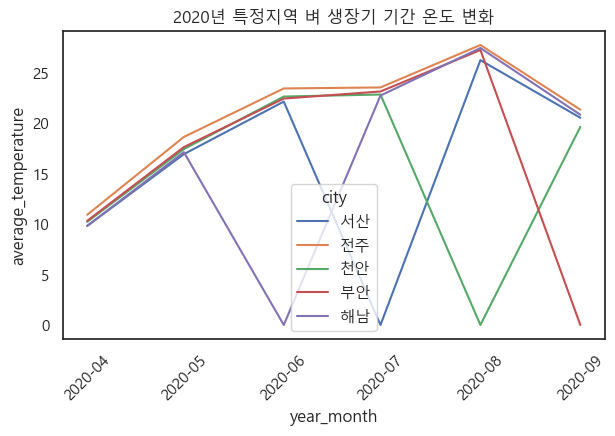

In [218]:
plt.xticks(rotation=45)

sns.lineplot(
    data=df,
    x="year_month",
    y="average_temperature",
    hue="city"
).set(
    title="2020년 특정지역 벼 생장기 기간 온도 변화"
)

# 3개 시군 지역, 2020년 각각 6, 7, 8월의 측정치가 0, 데이터 오류(?) 

In [219]:
def read_data(sql):
    return pd.read_sql(sql, conn)

read_sql = """
SELECT
    pos_name as "city",
    ym as "년_월별",
    ave_temp as "평균온도"
FROM
    mon_weather_obsv
WHERE
    (pos_name = "서산" OR
     pos_name = "해남" OR
     pos_name = "전주" OR
     pos_name = "천안" OR
     pos_name = "부안") AND 
    (ym >= "20220401" AND 
     ym <  "20221001")

"""
df = read_data(read_sql)
df

C:\Users\PC2307\AppData\Local\Temp\ipykernel_17576\2940118806.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql, conn)


,city,년_월별,평균온도
0,서산,2022-04-01,12.3
1,서산,2022-05-01,16.8
2,서산,2022-06-01,22.3
3,서산,2022-07-01,26.2
4,서산,2022-08-01,24.9
5,서산,2022-09-01,21.2
6,전주,2022-04-01,14.5
7,전주,2022-05-01,18.7
8,전주,2022-06-01,23.7
9,전주,2022-07-01,0.0


[Text(0.5, 1.0, '2022년 특정지역 벼 성장기간 온도 변화')]

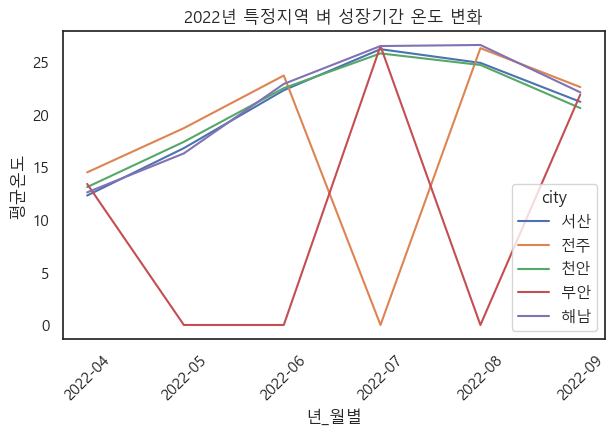

In [220]:
plt.xticks(rotation=45)

sns.lineplot(
    data=df,
    x="년_월별",
    y="평균온도",
    hue="city"
).set(
    title="2022년 특정지역 벼 성장기간 온도 변화"
)

In [221]:
def read_data(sql):
    return pd.read_sql(sql, conn)

read_sql = """
SELECT
    pos_name as "city",
    ym as "year_month",
    mon_fall as "월강우량"
FROM
    mon_weather_obsv
WHERE
    (pos_name = "서산" OR
     pos_name = "해남" OR
     pos_name = "전주" OR
     pos_name = "천안" OR
     pos_name = "부안") AND 
    (ym >= "20220401" AND 
     ym <  "20221001")

"""
df = read_data(read_sql)
df

C:\Users\PC2307\AppData\Local\Temp\ipykernel_17576\481794084.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql, conn)


,city,year_month,월강우량
0,서산,2022-04-01,52.2
1,서산,2022-05-01,2.9
2,서산,2022-06-01,352.4
3,서산,2022-07-01,178.4
4,서산,2022-08-01,468.7
5,서산,2022-09-01,165.9
6,전주,2022-04-01,0.0
7,전주,2022-05-01,6.8
8,전주,2022-06-01,164.2
9,전주,2022-07-01,0.0


[Text(0.5, 1.0, '2022년 특정지역 벼 생장기 월 강우량 변화')]

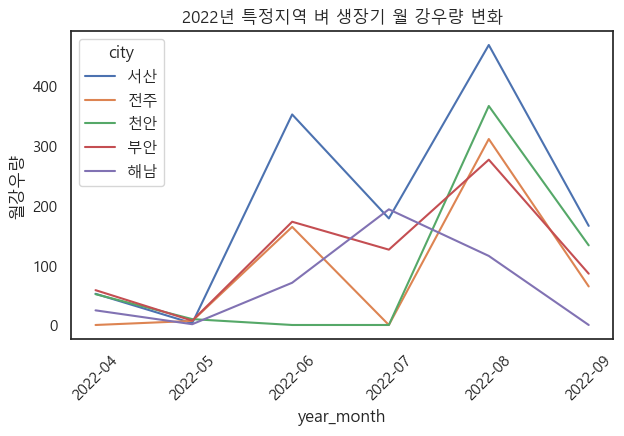

In [222]:
plt.xticks(rotation=45)

sns.lineplot(
    data=df,
    x="year_month",
    y="월강우량",
    hue="city"
).set(
    title="2022년 특정지역 벼 생장기 월 강우량 변화"
)

In [223]:
read_sql = """
SELECT
    pos_name as "city",
    ym as "year_month",
    tot_sunshine as "일조량_시간"
FROM
    mon_weather_obsv
WHERE
    (pos_name = "서산" OR
     pos_name = "해남" OR
     pos_name = "전주" OR
     pos_name = "천안" OR
     pos_name = "부안") AND 
    (ym >= "20220401" AND 
     ym <  "20221001")

"""
df = read_data(read_sql)
df

C:\Users\PC2307\AppData\Local\Temp\ipykernel_17576\481794084.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql, conn)


,city,year_month,일조량_시간
0,서산,2022-04-01,246.4
1,서산,2022-05-01,315.6
2,서산,2022-06-01,146.7
3,서산,2022-07-01,183.7
4,서산,2022-08-01,139.8
5,서산,2022-09-01,186.2
6,전주,2022-04-01,258.1
7,전주,2022-05-01,295.5
8,전주,2022-06-01,180.6
9,전주,2022-07-01,174.7


[Text(0.5, 1.0, '2022년 특정지역 벼 생장기 월 일조시간 변화')]

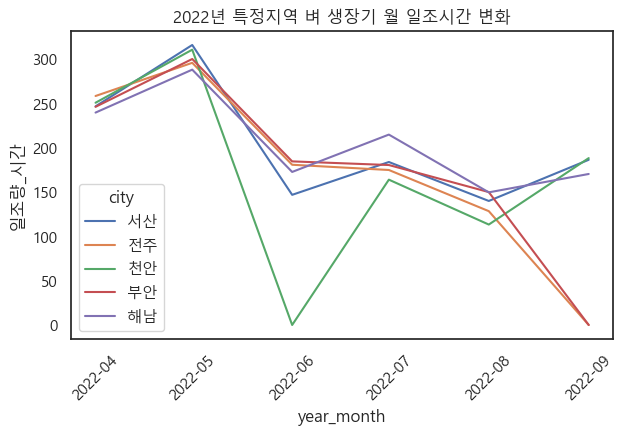

In [224]:
plt.xticks(rotation=45)

sns.lineplot(
    data=df,
    x="year_month",
    y="일조량_시간",
    hue="city"
).set(
    title="2022년 특정지역 벼 생장기 월 일조시간 변화"
)

In [225]:
def read_data(sql):
    return pd.read_sql(sql, conn)

read_sql = """
SELECT
    ref_name as "city",
    year(yyyy) as "년도별",
    year_fall as "강우량"
FROM
    anual_weather_obsv
WHERE
    ref_name = "김제시"

"""
df = read_data(read_sql)
df

C:\Users\PC2307\AppData\Local\Temp\ipykernel_17576\2353843626.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql, conn)


,city,년도별,강우량
0,김제시,2008,692.6
1,김제시,2009,700.5
2,김제시,2010,846.6
3,김제시,2011,1018.1
4,김제시,2012,1239.4
5,김제시,2013,615.0
6,김제시,2014,836.8
7,김제시,2015,519.0
8,김제시,2016,669.6
9,김제시,2017,635.0


[Text(0.5, 1.0, '김제시 년도별 벼 성장기 강우량 추이')]

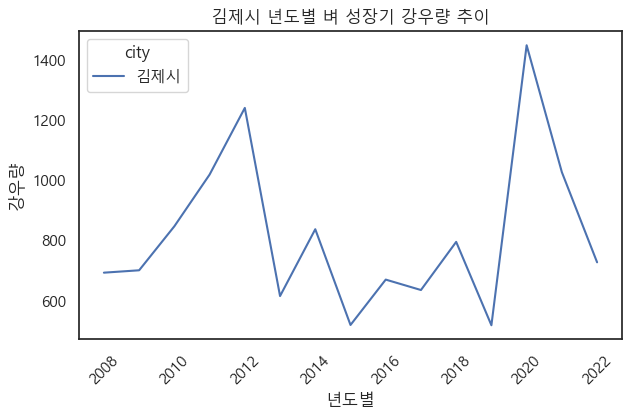

In [226]:
plt.xticks(rotation=45)

sns.lineplot(
    data=df,
    x="년도별",
    y="강우량",
    hue="city"
).set(
    title="김제시 년도별 벼 성장기 강우량 추이"
)

In [227]:
def read_data(sql):
    return pd.read_sql(sql, conn)

read_sql = """
SELECT
    ref_name as "city",
    year(yyyy) as "년도별",
    year_sunshine as "일조량_시간"
FROM
    anual_weather_obsv
WHERE
    ref_name = "김제시"

"""
df = read_data(read_sql)
df

C:\Users\PC2307\AppData\Local\Temp\ipykernel_17576\1028349909.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql, conn)


,city,년도별,일조량_시간
0,김제시,2008,1083.2
1,김제시,2009,1019.4
2,김제시,2010,712.1
3,김제시,2011,1010.9
4,김제시,2012,1117.4
5,김제시,2013,1050.2
6,김제시,2014,1091.7
7,김제시,2015,865.6
8,김제시,2016,1228.1
9,김제시,2017,1266.9


[Text(0.5, 1.0, '김제시 년도별 벼 성장기 일조량 추이')]

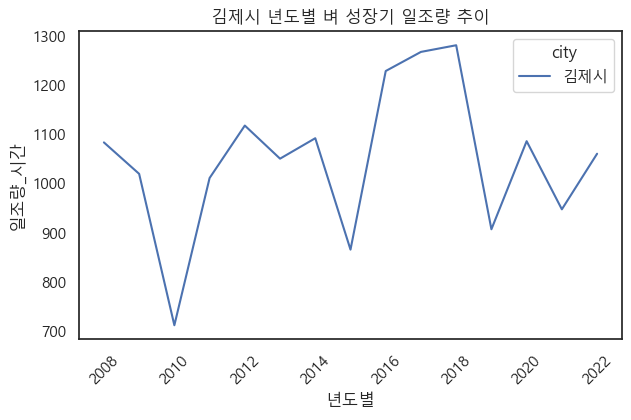

In [228]:
plt.xticks(rotation=45)

sns.lineplot(
    data=df,
    x="년도별",
    y="일조량_시간",
    hue="city"
).set(
    title="김제시 년도별 벼 성장기 일조량 추이"
)

# 월별 온도에 대한 히스토그램 작성 및 데이터 분포 확인 

In [229]:
def read_data(sql):
    return pd.read_sql(sql, conn)

read_sql = """
SELECT
    MONTH(ym) AS "month",
    ave_temp AS "월평균기온"
FROM
    mon_weather_obsv

"""
df = read_data(read_sql)
df

C:\Users\PC2307\AppData\Local\Temp\ipykernel_17576\3424524299.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql, conn)


,month,월평균기온
0,1,0.3
1,2,1.3
2,3,7.3
3,4,13.1
4,5,16.8
...,...,...
16656,9,22.1
16657,10,16.3
16658,11,12.1
16659,12,2.5


<Axes: xlabel='월평균기온', ylabel='Count'>

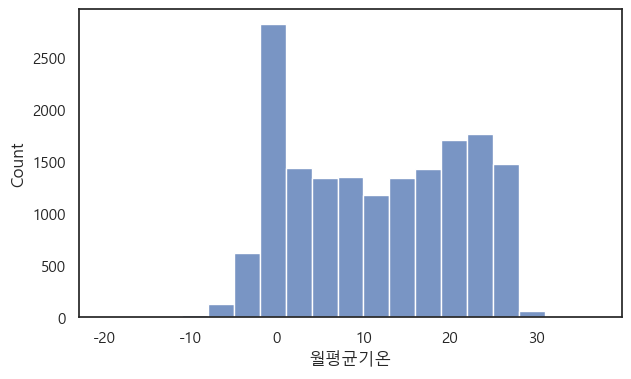

In [230]:
# 한글표시 기능 추가
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

sns.histplot(
    x="월평균기온",
    data=df, 
    bins=[x for x in range(-20, 40, 3)]
)

In [231]:
def read_data(sql):
    return pd.read_sql(sql, conn)

read_sql = """
SELECT
    MONTH(ym) AS "month",
    ave_temp AS "월평균기온"
FROM
    mon_weather_obsv
WHERE
    MONTH(ym) >= "04" AND
    MONTH(ym) <= "09"

"""
df = read_data(read_sql)
df

C:\Users\PC2307\AppData\Local\Temp\ipykernel_17576\2306621904.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql, conn)


,month,월평균기온
0,4,13.1
1,5,16.8
2,6,18.7
3,7,25.3
4,8,23.4
...,...,...
8280,5,19.1
8281,6,22.3
8282,7,26.4
8283,8,26.3


<Axes: xlabel='월평균기온', ylabel='Count'>

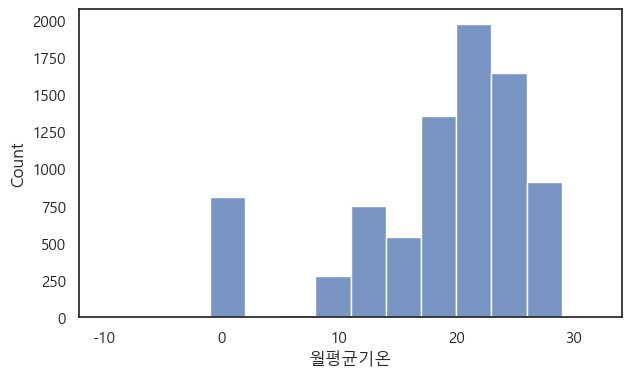

In [232]:
sns.histplot(
    x="월평균기온",
    data=df, 
    bins=[x for x in range(-10, 35, 3)]
)

# 월 강우량과 월 일조시간에 대한 Scatter Plot 

In [233]:
read_sql = """
SELECT
    mon_fall "월_강우량(mm)", 
    tot_sunshine "월_일조량(시간)" 
FROM
    mon_weather_obsv  
"""
df = read_data(read_sql)
df

C:\Users\PC2307\AppData\Local\Temp\ipykernel_17576\2306621904.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql, conn)


,월_강우량(mm),월_일조량(시간)
0,71.1,161.5
1,0.6,0.0
2,103.9,0.0
3,13.5,210.8
4,0.0,205.1
...,...,...
16656,328.8,147.8
16657,18.1,223.5
16658,56.9,186.3
16659,7.8,187.6


[Text(0.5, 1.0, '강우량/일조시간 산점도(scatter plot)')]

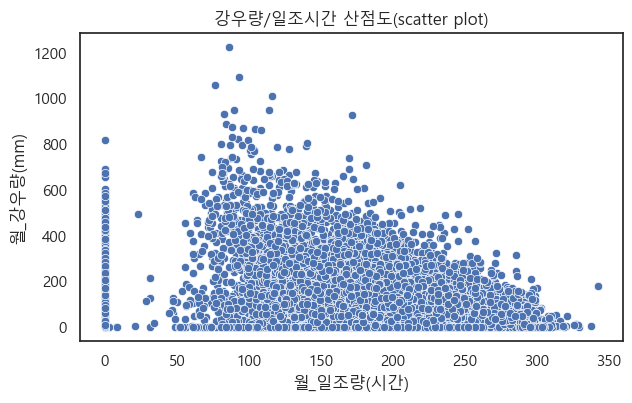

In [234]:
# 한글표시 기능 추가
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')
# scatter plot
sns.scatterplot(
    x="월_일조량(시간)",
    y="월_강우량(mm)",
    data=df
).set(title="강우량/일조시간 산점도(scatter plot)")

# 김제시의 벼 생산량과 년간 기상관측 두 테이블의 JOIN 연산

In [235]:
read_sql = """
SELECT
    sub_admin AS "시군지역",
    year(yyyy) AS "경작년도", 
    rice_product_ton AS "벼생산량(ton)", 
    rice_per10ha_kg "단위생산(kg/10ha)", 
    year_fall "강우량(mm)", 
    year_sunshine "일조량(시간)", 
    ave_temp "평균온도", 
    max_temp "월평균최대온도", 
    min_temp "월평균최저온도"   
FROM
    rice_product
LEFT JOIN 
    anual_weather_obsv
ON 
    sub_admin = ref_name
WHERE
    sub_admin = "김제시" and
    YEAR(p_year) = YEAR(yyyy)
ORDER BY
     2
"""
df = read_data(read_sql)
df

C:\Users\PC2307\AppData\Local\Temp\ipykernel_17576\2306621904.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql, conn)


,시군지역,경작년도,벼생산량(ton),단위생산(kg/10ha),강우량(mm),일조량(시간),평균온도,월평균최대온도,월평균최저온도
0,김제시,2010,117106,522,846.6,712.1,20.5333,27.2,9.1
1,김제시,2012,110469,503,1239.4,1117.4,11.5000,25.7,0.0
2,김제시,2013,116455,553,615.0,1050.2,17.9667,27.7,0.0
3,김제시,2014,116196,556,836.8,1091.7,20.4000,24.9,12.5
4,김제시,2015,122350,587,519.0,865.6,17.0167,25.6,0.0
5,김제시,2016,111347,557,669.6,1228.1,21.6000,27.3,13.1
6,김제시,2017,105677,557,635.0,1266.9,17.6667,27.1,0.0
7,김제시,2018,100872,556,794.8,1280.4,21.6833,28.2,12.9
8,김제시,2019,92571,555,518.1,906.9,17.3167,26.8,0.0
9,김제시,2020,82631,493,1447.4,1085.7,16.7667,27.2,0.0


 # sql 결과를 list type으로 받아서 행렬을 바꾸는 함수 적용

In [253]:
import numpy as np
with conn.cursor(pymysql.cursors.SSCursor) as cursor:
    sql = """
            SELECT
                #sub_admin AS "시군지역",
                year(yyyy) AS "경작년도", 
                rice_product_ton AS "벼생산량(ton)", 
                year_fall "강우량(mm)"                
            FROM
                rice_product
            LEFT JOIN 
                anual_weather_obsv
            ON 
                sub_admin = ref_name
            WHERE
                sub_admin = "김제시" and
                YEAR(p_year) = YEAR(yyyy) AND
                YEAR(yyyy) >= "2015"
            ORDER BY
                 1
            """
    cursor.execute(sql)
    rows = cursor.fetchall()
    print(rows) #test
    new_rows=np.transpose(rows)
    print(new_rows) #test
    print(new_rows[0]) #test

[(2015, 122350, 519.0), (2016, 111347, 669.6), (2017, 105677, 635.0), (2018, 100872, 794.8), (2019, 92571, 518.1), (2020, 82631, 1447.4), (2021, 92733, 1026.1), (2022, 102433, 727.0)]
[[  2015.    2016.    2017.    2018.    2019.    2020.    2021.    2022. ]
 [122350.  111347.  105677.  100872.   92571.   82631.   92733.  102433. ]
 [   519.     669.6    635.     794.8    518.1   1447.4   1026.1    727. ]]
[2015. 2016. 2017. 2018. 2019. 2020. 2021. 2022.]


# 막대와 꺽은선을 함께 나타내는 이중 그래프를 그려보기

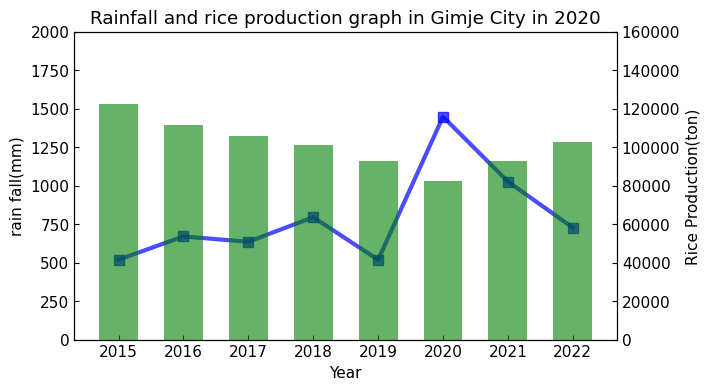

In [254]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (7,4)
plt.rcParams['font.size'] = 11

# 2. 데이터 준비
x = np.arange(2015,2023)   
y1 = np.array(new_rows[2])
y2 = np.array(new_rows[1])

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

ax1.plot(x, y1, '-s', color='blue', markersize=7, linewidth=3, alpha=0.7)
ax1.set_ylim(0, 2000)
ax1.set_xlabel('Year')
ax1.set_ylabel('rain fall(mm)')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='green', label='Demand', alpha=0.6, width=0.6)
ax2.set_ylim(0, 160000)
ax2.set_ylabel(r'Rice Production(ton)')
ax2.tick_params(axis='y', direction='in')
plt.title('Rainfall and rice production graph in Gimje City in 2020')
plt.show()

# 2022년 벼 생산량 상위 5개 시군에 대한 Pie Chart 시각화

In [251]:
with conn.cursor(pymysql.cursors.SSCursor) as cursor:
    sql = """
            SELECT
                sub_admin AS "시군지역",
                sum(rice_product_ton) AS "벼생산량(ton)"           
            FROM
                rice_product
            WHERE 
                YEAR(p_year) = "2022"
            GROUP BY  
                1
            ORDER BY
                2 DESC
            LIMIT
                5 
            """
    cursor.execute(sql)
    rows = cursor.fetchall()
    print(rows) #test
    new_rows=np.transpose(rows)
    print(new_rows) #test
    print(new_rows[0]) #test

[('당진시', Decimal('111852')), ('김제시', Decimal('102433')), ('서산시', Decimal('97484')), ('해남군', Decimal('96105')), ('익산시', Decimal('91078'))]
[['당진시' '김제시' '서산시' '해남군' '익산시']
 [Decimal('111852') Decimal('102433') Decimal('97484') Decimal('96105')
  Decimal('91078')]]
['당진시' '김제시' '서산시' '해남군' '익산시']


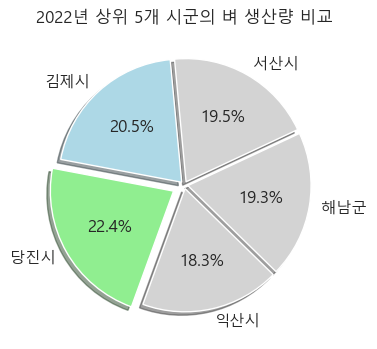

In [252]:
import matplotlib.pyplot as plt

#  한글표시 기능 추가
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')


ratio = new_rows[1]
labels = new_rows[0]
explode = [0.1, 0.03, 0.03, 0.03, 0.03]
colors = ['lightgreen', 'lightblue', 'lightgray', 'lightgray', 'lightgray']

plt.pie(
    ratio,                     # 각 영역의 값 (list)
    explode = explode,         # 부채꼴이 차트 중심에서 벗어나는 정도 (list)
    labels = labels,           # 각 영역의 label (list)
    colors = colors,           # 각 영역 색 지정 (list)
    autopct='%.1f%%',          # 부채꼴 안에 표시되는 숫자 형식 (str)
    shadow = True,             # 차트 그림자 설정 여부 (True or False)
    startangle = 250,          # 부채꼴이 그려지기 시작하는 각도 (float)
    counterclock = False,      # 반시계방향 순서로 데이터 표시 여부 (True or False)
   )
plt.title('2022년 상위 5개 시군의 벼 생산량 비교')
plt.show()